In [12]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

#Create random points 
def generate_points(size, min_x, max_x, min_y, max_y):
    x = np.random.randint(min_x, max_x, size)
    y = np.random.randint(min_x, max_y, size)

    #Join x, and y
    points = np.stack((x, y), axis=1)

    #Reshape each point as [x,y]
    points = points.reshape(size,2)
    return points


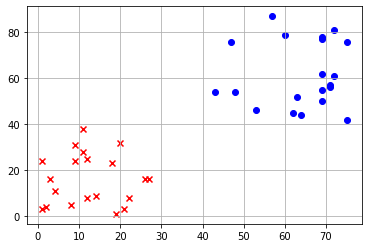

In [13]:
#Max and Min of x and y for first class
c0_range = [[0, 30],[0, 40]]
#Max and Min of x and y for second class
c1_range = [[40, 80],[50, 90]]
#Two classes size together
points_size = 30
#Color of each class
class_color = ['r','b']
#Mark of each class
class_mark = ['x' ,'o']

#Generate C1 points
c0_Points = generate_points(points_size, c0_range[0][0], c0_range[0][1], c0_range[1][0], c0_range[1][1])
#Generate C2 points
c1_Points = generate_points(points_size, c1_range[0][0], c1_range[0][1], c1_range[1][0], c1_range[1][1])

c0_training = c0_Points[0:20]
c1_training = c1_Points[0:20]
c0_testing = c0_Points[20:]
c1_testing = c1_Points[20:]

#Plot C1 points
plt.scatter(c0_training[0:20, 0],c0_training[0:20, 1], marker=class_mark[0], c=class_color[0])
#Plot C2 points
plt.scatter(c1_training[0:20, 0],c1_training[0:20, 1], marker=class_mark[1], c=class_color[1])
grid()


In [14]:
#Determine learning rate
learning_rate = .01

#Assign random values for the weight vector
w = [np.random.randint(10) , np.random.randint(10)]
print(w)

#Assign random value for threshold (The data is usually separated no matter what the value of the threshold is)
threshold = np.random.randint(10)
print(threshold)


[7, 8] 6


In [113]:
data = np.array([])
label = np.array([])

#Join c0 and c1 points together
data = np.vstack((c0_training, c1_training))
#Create label for the data
label = np.concatenate((np.zeros(20),np.ones(20)))  

In [122]:
w_update = w
i = 0
weights = np.array([])

#Stop when classifying whole points correctly
while i < data.shape[0]:
    #Result = [wx wy][x y]+threshold and then calculate step function
    result = np.heaviside(data[i].dot(w_update)-threshold,0)
    #Print Correct class vs Predicted class and previous weight vector
    print("Point:", data[i],"#","Correct Class:",int(label[i]),"#","Predicted Class:",int(result),"#","Weight Vector:",w_update)
    
    #If classify wrong
    if result != label[i]:
        #Update the weight vector
        w_update = w_update + learning_rate*(label[i] - result)*data[i]
        #Save all weights
        weights = np.append(weights,[w_update[0],w_update[1]])
        #Reset while loop
        i = 0;
    else:
        #If classify correct go next point
        i = i+1
        
weights = weights.reshape(-1,2)

Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [7, 8]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.92 7.95]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.84 7.9 ]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.76 7.85]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.68 7.8 ]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.6  7.75]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.52 7.7 ]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.44 7.65]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.36 7.6 ]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.28 7.55]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.2 7.5]
Point: [8 5] # Correct Class: 0 # Predicted Class: 1 # Weight Vector: [6.12 7.45]
Point: [8 5] # Correct 

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, PillowWriter  
from matplotlib import animation, rc
from IPython.display import HTML, Image

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], linestyle='solid',color='green')

#X and Y Limits
def init():
    ax.set_xlim(-50, 80)
    ax.set_ylim(-80, 150)
    return ln,

#To update the weight vector and draw the decision line relative to it 
def update(i):
    xdata = [0,80]
    ydata =[(threshold-0*weights[i][0])/weights[i][1],(threshold-80*weights[i][0])/weights[i][1]]
    ln.set_data(xdata, ydata)
    return ln,


#Plot C1 points
plt.scatter(c0_training[0:20, 0],c0_training[0:20, 1], marker=class_mark[0], c=class_color[0])
#Plot C2 points
plt.scatter(c1_training[0:20, 0],c1_training[0:20, 1], marker=class_mark[1], c=class_color[1])
ax.legend(['Decision Line', 'Class_0','Class_1'])

ani = FuncAnimation(fig, update,init_func=init, blit=True, interval=100, repeat=True, save_count=1500)
plt.show()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('im.gif', writer=writer)

